In [241]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [242]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [243]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [244]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaled = scaler.fit_transform(market_data_df)

# Create a DataFrame with the scaled data
market_data_scaled = pd.DataFrame(X_scaled, columns=market_data_df.columns, index=market_data_df.index)


# Set the coinid column as index
market_data_scaled.index = market_data_df.index

# Display sample data
market_data_scaled.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


In [245]:
# Create a DataFrame with the scaled data



# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data


### Find the Best Value for k Using the Original Scaled DataFrame.

In [246]:
k_values = range(1, 12)

# Create an empty list to store the inertia values
inertia = []

# Compute inertia for each k
for k in k_values:
    # Create a KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fit the model to the scaled data
    kmeans.fit(market_data_scaled)
    # Append the inertia to the list
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'K': list(k_values),
    'Inertia': inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

,K,Inertia
0,1,287.000000
1,2,212.123342
2,3,170.193571
3,4,79.022435
4,5,71.097914
5,6,66.108827
6,7,54.488123
7,8,43.224693
8,9,32.860884
9,10,28.404885


In [247]:
# Create a list with the number of k-values to try

# Use a range from 1 to 11

# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list




# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve


# Display the DataFrame


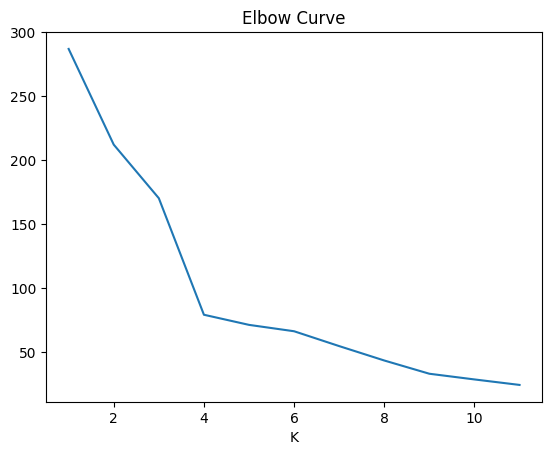

In [248]:
import matplotlib.pyplot as plt
# Plot the Elbow Curve using matplotlib after Pandas plotting
elbow_df.plot.line(x="K", y="Inertia", title="Elbow Curve", legend=False)

# # Add proper x-ticks
# plt.xticks(ticks=elbow_df["K"])

# # Add labels to the axes
# plt.xlabel("k")
# plt.ylabel("Inertia")

# Show the plot
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [249]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=42)




In [250]:
# Fit the K-Means model using the scaled data
kmeans.fit(market_data_scaled)



KMeans(n_clusters=4, random_state=42)

In [251]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_values = kmeans.predict(market_data_scaled)


# View the resulting array of cluster values.
cluster_values


array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2],
      dtype=int32)

In [252]:
# Create a copy of the DataFrame
clustered_df = market_data_scaled.copy()


In [253]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df["class"] = cluster_values


# Display sample data
clustered_df


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,class
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


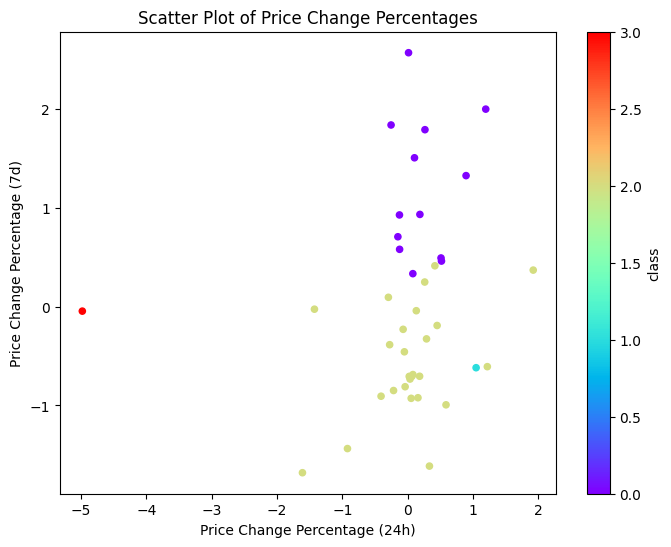

In [254]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.




# Create the scatter plot
ax = clustered_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c='class',  
    cmap="rainbow",
    title="Scatter Plot of Price Change Percentages",
    figsize=(8, 6)
)

# Add labels for better visualization
plt.xlabel("Price Change Percentage (24h)")
plt.ylabel("Price Change Percentage (7d)")
plt.show()


### Optimize Clusters with Principal Component Analysis.

In [255]:
# Create a PCA model instance and set `n_components=3`.

# Initialize PCA with n_components=2 since you only have 2 features
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(X)

# Convert PCA result into a DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

# If you need to keep the 'class' column for coloring
pca_df['class'] = clustered_df['class']



In [256]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.


# View the first five rows of the DataFrame. 

features = clustered_df.select_dtypes(include=['float64', 'int64'])

# Step 1: Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 2: Fit PCA with 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_features)

# Step 3: Convert to DataFrame
pca_df = pd.DataFrame(
    data=principal_components, 
    columns=['PCA1', 'PCA2', 'PCA3']
)

# Add back 'class' or any other labels for visualization purposes, if necessary
pca_df['class'] = clustered_df['class']

# Step 4: View the first five rows
print(pca_df.head())


       PCA1      PCA2      PCA3  class
0 -0.600667  0.842760  0.461595    NaN
1 -0.458261  0.458466  0.952877    NaN
2 -0.433070 -0.168126 -0.641752    NaN
3 -0.471835 -0.222660 -0.479053    NaN
4 -1.157800  2.041209  1.859715    NaN


In [257]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
# Retrieve the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Display the explained variance ratio as an array
print(explained_variance)


[0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total is 0.89503166.

In [258]:
print(clustered_df.columns)

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y', 'class'],
      dtype='object')


In [259]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data

pca_data_df = pd.DataFrame(
    data=pca_df[['PCA1', 'PCA2', 'PCA3']],  
    # index=clustered_df['class']  
)

#show coinid column
pca_data_df['coin_id'] = clustered_df.index

# Set the coinid column as the index
pca_data_df.set_index('coin_id', inplace=True)


# Step 2: Copy the crypto names (assuming they are in a column named 'crypto_name')
# pca_data_df['class'] = clustered_df['class']

# Step 3: Set the coinid column as the index (already done in step 1)

# Step 4: Display a sample of the data
pca_data_df.head()



,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [260]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11


# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list


# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve


# Display the DataFrame


k_values = list(range(1, 12))  # K values from 1 to 11

# Step 2: Create an empty list to store the inertia values
inertia_values = []

# Step 3: Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the current k-value
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the PCA DataFrame (assuming the PCA DataFrame is pca_data_df)
    kmeans.fit(pca_data_df[['PCA1', 'PCA2', 'PCA3']])
    
    # Append the inertia to the inertia list
    inertia_values.append(kmeans.inertia_)

# Step 4: Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Step 5: Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Step 6: Display the DataFrame
elbow_df.head(10)

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901
5,6,31.749005
6,7,28.031869
7,8,19.451747
8,9,13.814082
9,10,10.630648


In [261]:
k_values = list(range(1, 11))  # K values from 1 to 10 (since expected range ends at 10)

# Step 2: Create an empty list to store the inertia values
inertia_values = []

# Step 3: Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the current k-value
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=15)  # n_init ensures robustness of result
    
    # Fit the model to the PCA DataFrame (assuming the PCA DataFrame is pca_data_df)
    kmeans.fit(pca_data_df[['PCA1', 'PCA2', 'PCA3']])
    
    # Append the inertia to the inertia list
    inertia_values.append(kmeans.inertia_)

# Step 4: Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Step 5: Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Step 6: Display the DataFrame
elbow_df

,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.839466
5,6,27.618972
6,7,21.134056
7,8,17.091637
8,9,13.681140
9,10,10.572380


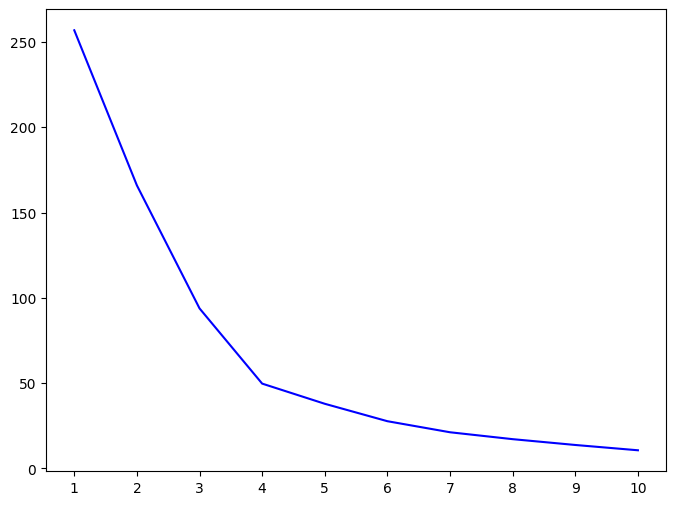

In [262]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], linestyle='-', color='b')

plt.xticks(range(1, 11))
plt.show()


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [263]:
# Initialize the K-Means model using the best value for k

kmeans = KMeans(n_clusters=4, random_state=42)



In [264]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_data_df[['PCA1', 'PCA2', 'PCA3']])

KMeans(n_clusters=4, random_state=42)

In [265]:
# # Retrieve the cluster labels
# pca_data_df['crypto_cluster'] = kmeans.labels_

# # Display the resulting DataFrame with the cluster labels
# pca_data_df.head()

In [266]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_values = kmeans.predict(pca_data_df[['PCA1', 'PCA2', 'PCA3']])


# Print the resulting array of cluster values.
cluster_values


array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2],
      dtype=int32)

In [267]:
# Create a copy of the DataFrame with the PCA data
clustered_df = pca_data_df.copy()


# Add a new column to the DataFrame with the predicted clusters
clustered_df["crypto_cluster"] = cluster_values


# Display sample data
clustered_df.head()


,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [268]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
# Use "rainbow" for the color to better visualize the data.

import hvplot.pandas 

pca_data_df['crypto_cluster'] = clustered_df['crypto_cluster']


# Now, create a scatter plot using hvPlot
scatter_plot = pca_data_df.hvplot.scatter(
    x="PCA1", 
    y="PCA2", 
    c='crypto_cluster',
    cmap="rainbow",
    xlabel="PCA1",
    ylabel="PCA2",
    size=45,
)

# Display the scatter plot
scatter_plot

:Scatter   [PCA1]   (PCA2,crypto_cluster)

### Determine the Weights of Each Feature on each Principal Component

In [269]:
# Use the columns from the original scaled DataFrame as the index
# market_data_scaled.index = market_data_df.index
# # # Copy the crypto names from the original data
# # market_data_scaled['coin_id'] = market_data_df['coin_id']
# # # Set the coinid column as index
# # market_data_scaled.set_index('coin_id', inplace=True)
# # Display sample data
# market_data_scaled.head(10)


In [270]:
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2','PCA3'], index=market_data_scaled.columns)
pca_component_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


In [272]:
# Use the columns from the original scaled DataFrame as the index.
# Copy the crypto names from the original data
pca_data_df['coin_id'] = clustered_df.index

# Set the coinid column as the index
pca_data_df.set_index('coin_id', inplace=True)

# Display sample data
pca_data_df.head()



,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** PCA 1(positive): 0.594468. PCA 2 (positive): 0.562182. PCA 3 (positive): 0.787670
            PCA 1(negative): -0.416728. PCA 2 (negative): -0.150789. PCA 3 (negative): -0.361377
    